In [55]:
import matplotlib.pyplot as plt 
import numpy as np 
import datetime
import scipy.stats as stats
import pandas as pd 
from scipy.stats import linregress
file1=pd.read_csv('Final_Merge_7_15_20.csv')
file2=pd.read_csv('Washington_pop_data.csv')

In [56]:
popmerge=file1.merge(file2,on='County', how='outer')
counties=popmerge.groupby('County')
deathcount=pd.DataFrame(counties['Deaths'].sum())
popunique=pd.DataFrame(counties['Population'].unique())
floating=popunique.astype(float)
popmerge2=deathcount.merge(floating,on='County', how='outer')
ratio=pd.DataFrame(popmerge2['Deaths']/popmerge2['Population']*100000)
casecount=pd.DataFrame(counties['NewPos_All'].sum())
rename=ratio.rename(columns={0:'Deaths'})
deathpopsorted=popmerge2.sort_values('Population')

In [57]:
agehosp1=file1[['Age 0-19_hospitalization','Age 20-39_hospitalization','Age 40-59_hospitalization','Age 60-79_hospitalization','Age 80+_hospitalization']].sum()
agedeath1=file1[['Age 0-19_death','Age 20-39_death','Age 40-59_death','Age 60-79_death','Age 80+_death']].sum()
agerange1total=file1[['Age 0-19_cases','Age 20-39_cases','Age 40-59_cases','Age 60-79_cases','Age 80+_cases']].sum()

Text(0.5, 1.0, 'Deaths by Age Group')

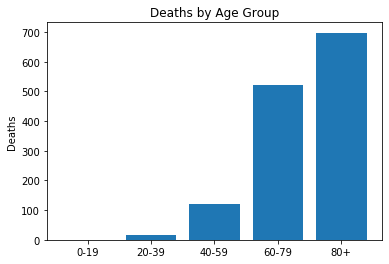

In [58]:
labels='0-19','20-39','40-59','60-79','80+'
sizes=agedeath1
ypos=np.arange(len(labels))
plt.bar(ypos,sizes,align='center',alpha=1)
plt.xticks(ypos,labels)
plt.ylabel('Deaths')
plt.title('Deaths by Age Group')

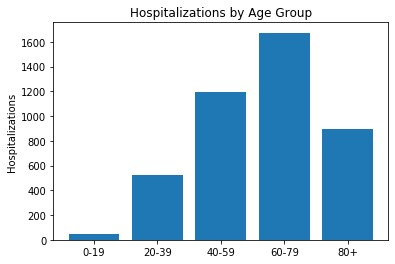

In [59]:
sizes2=agehosp1
plt.bar(ypos,sizes2,align='center',alpha=1)
plt.xticks(ypos,labels)
plt.ylabel('Hospitalizations')
plt.title('Hospitalizations by Age Group')
plt.show()

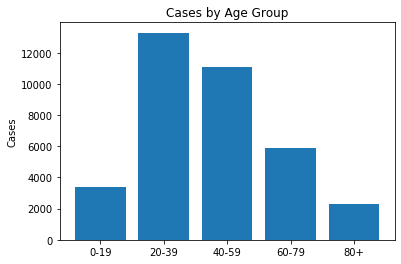

In [60]:
sizes3=agerange1total
plt.bar(ypos,sizes3,align='center',alpha=1)
plt.xticks(ypos,labels)
plt.ylabel('Cases')
plt.title('Cases by Age Group')
plt.show()

In [61]:
floatingsorted=floating.sort_values('Population')
newdf=casecount.merge(floatingsorted,on='County')
sortednewdf=newdf.sort_values('Population')
sortednewdf2=newdf.sort_values('Population')
newdf3=rename.merge(floatingsorted,on='County')
sortednewdf3=newdf3.sort_values('Population')



In [62]:
newfloating=sortednewdf['Population']
newcasecount=sortednewdf['NewPos_All']
newfloating2=sortednewdf2['Population']
newcasecount2=sortednewdf2['NewPos_All']
newdeathcount=deathpopsorted['Deaths']
newfloating3=deathpopsorted['Population']

In [63]:
popvalues=pd.DataFrame(popmerge2['Population'])
ratiomerge=rename.merge(popvalues,on='County')
ratiomergesorted=ratiomerge.sort_values('Population')


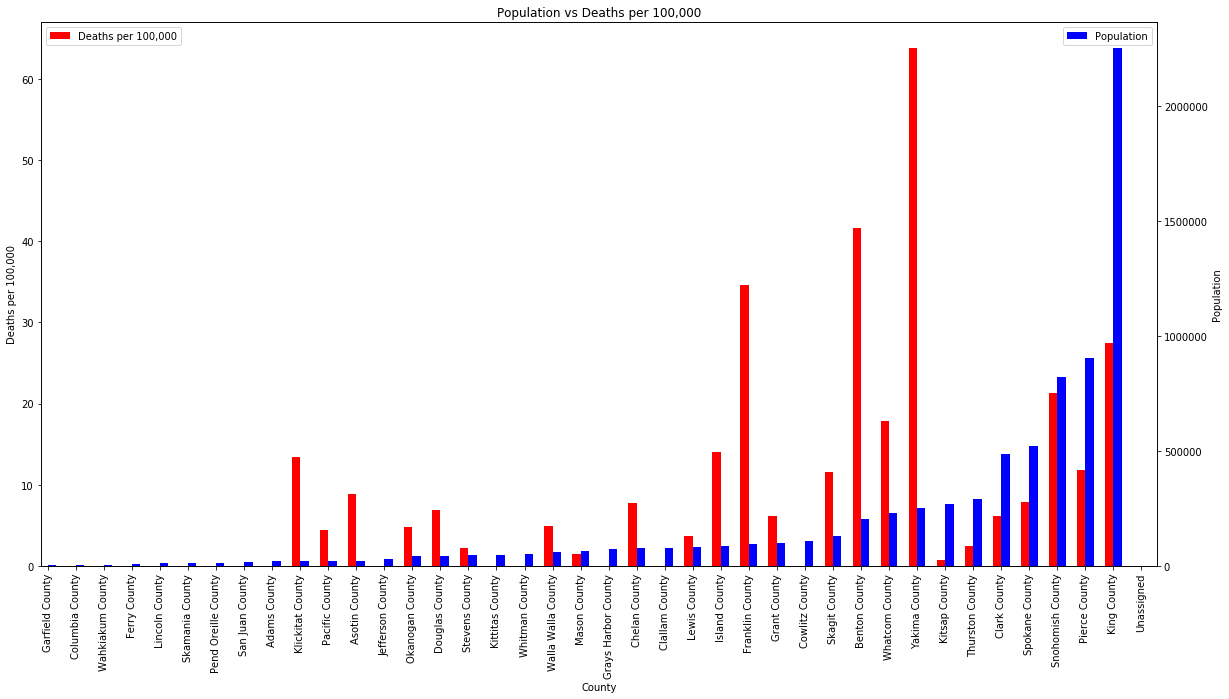

In [64]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=.3
ratiomergesorted['Deaths'].plot(kind='bar',color='r',alpha=1,figsize=(20,10),ax=ax,width=width,position=1,title='Population vs Deaths per 100,000')
ratiomergesorted['Population'].plot(kind='bar',color='b',alpha=1,ax=ax2,position=0,figsize=(20,10),width=width)
ax.set_ylabel('Deaths per 100,000')
ax2.set_ylabel('Population')
ax.legend(('Deaths per 100,000',),loc='upper left')
ax2.legend(('Population',),loc='upper right')
plt.show()



In [65]:
casemerge=casecount.merge(floating,on='County',how='outer')
casemerge23=casemerge.sort_values('Population')
caseratiorename=(casemerge23['NewPos_All']/casemerge23['Population']*100000)
sortedcasesfrompop=casemerge23['NewPos_All']
sortedpopwithcases=casemerge23['Population']
caseratio=((sortedcasesfrompop/sortedpopwithcases)*100000)

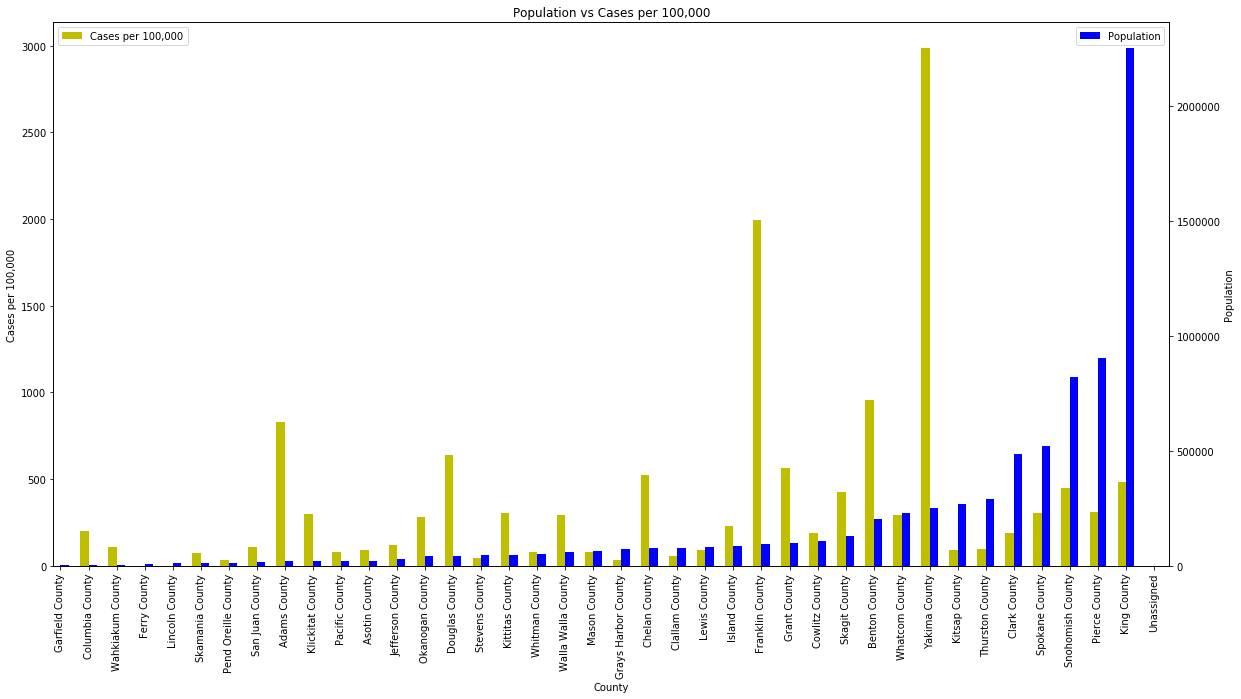

In [66]:
fig3=plt.figure()
ax5=fig3.add_subplot(111)
ax6=ax5.twinx()
width=.3
caseratio.plot(kind='bar',color='y',alpha=1,figsize=(20,10),ax=ax5,width=width,position=1,title='Population vs Cases per 100,000')
sortedpopwithcases.plot(kind='bar',color='b',alpha=1,ax=ax6,position=0,figsize=(20,10),width=width)
ax5.set_ylabel('Cases per 100,000')
ax6.set_ylabel('Population')
ax5.legend(('Cases per 100,000',),loc='upper left')
ax6.legend(('Population',),loc='upper right')
plt.show()

In [67]:
hospcount=pd.DataFrame(counties['Hospitalizations_hospitalization'].sum())
hosppop=hospcount.merge(floating,on='County',how='outer')
ratio=pd.DataFrame(hosppop['Hospitalizations_hospitalization']/popmerge2['Population']*100000)
hospdeathcomarison=hospcount.merge(deathcount,on='County')
hospdeathcomarisonsorted=hospdeathcomarison.sort_values('Hospitalizations_hospitalization')
deathdeathsorted=hospdeathcomarisonsorted['Hospitalizations_hospitalization']
pophosp=hospcount.merge(floatingsorted,on='County')
pophospsprted=pophosp.sort_values('Population')
hosppopsorted=pophospsprted['Hospitalizations_hospitalization']
poppophospsorted=pophospsprted['Population']
hospratio=((hosppopsorted/poppophospsorted)*100000)

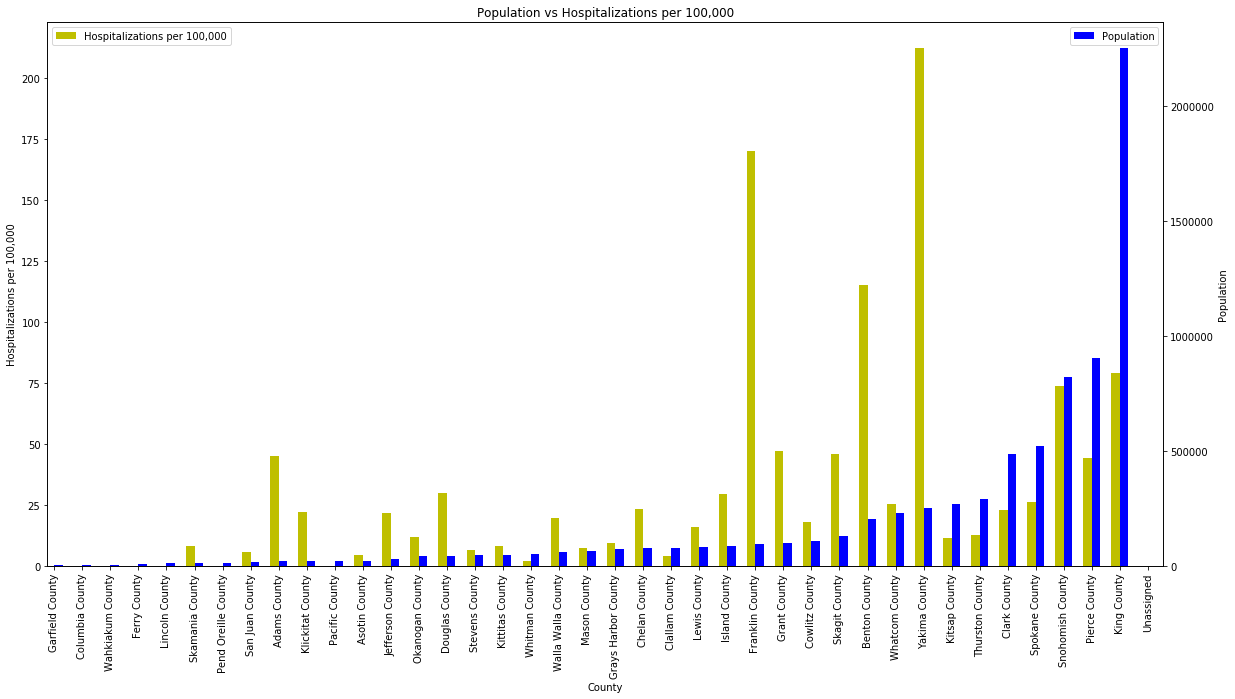

In [68]:
fig50=plt.figure()
ax90=fig50.add_subplot(111)
ax100=ax90.twinx()
width=.3
hospratio.plot(kind='bar',color='y',alpha=1,figsize=(20,10),ax=ax90,width=width,position=1,title='Population vs Hospitalizations per 100,000')
poppophospsorted.plot(kind='bar',color='b',alpha=1,ax=ax100,position=0,figsize=(20,10),width=width)
ax90.set_ylabel('Hospitalizations per 100,000')
ax100.set_ylabel('Population')
ax90.legend(('Hospitalizations per 100,000',),loc='upper left')
ax100.legend(('Population',),loc='upper right')
plt.show()

In [69]:
##POPULATION DENSITY##
file3=pd.read_csv('Washington_density_data.csv')
mergedf=popmerge.merge(file3,on='County',how='outer')
mergedfgrouped=mergedf.groupby('County')
densityvalues=pd.DataFrame(mergedfgrouped['Density'].unique()).astype(float)
popdata=pd.DataFrame(mergedfgrouped['Population'].unique()).astype(float)
hospitalizationsvalues=pd.DataFrame((mergedfgrouped['Hospitalizations_hospitalization'].sum()/mergedfgrouped['Population'].unique()).astype(float)*100000)
casesvalues=pd.DataFrame((mergedfgrouped['NewPos_All'].sum()/mergedfgrouped['Population'].unique()).astype(float)*100000)
deathvaleus=pd.DataFrame((mergedfgrouped['Deaths'].sum()/mergedfgrouped['Population'].unique()).astype(float)*100000)
smalldf=densityvalues.merge(hospitalizationsvalues,on='County').sort_values('Density')
smallrename=smalldf.rename(columns={0:'Hosp'})
smalldf2=densityvalues.merge(casesvalues,on='County').sort_values('Density')
smallrename2=smalldf2.rename(columns={0:'cases'})
smalldf3=densityvalues.merge(deathvaleus,on='County').sort_values('Density')
smallrename3=smalldf3.rename(columns={0:'deaths'})
smalldf4=hospitalizationsvalues.merge(deathvaleus,on='County')
smalldf4rename=smalldf4.rename(columns={'0_x':'Hosp','0_y':'Deaths'}).sort_values('Hosp')


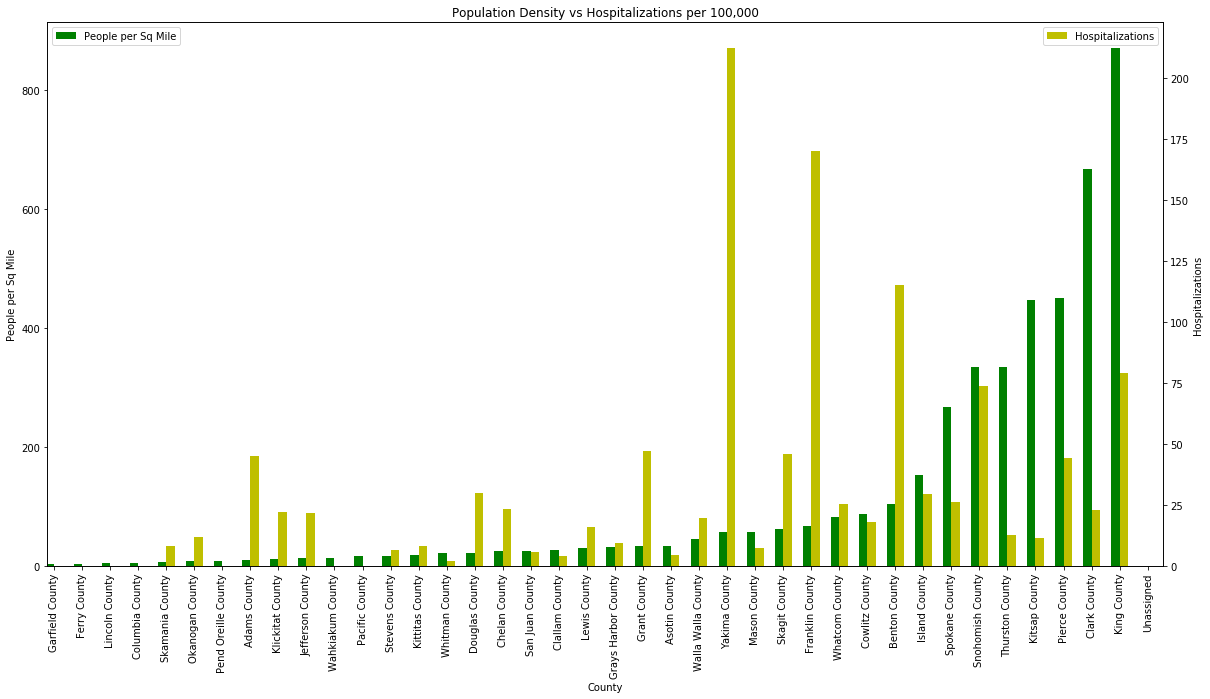

In [70]:
##Hospitalizations
figure1=plt.figure()
axel1=figure1.add_subplot(111)
axel2=axel1.twinx()
width=.3
smallrename['Density'].plot(kind='bar',color='g',alpha=1,figsize=(20,10),ax=axel1,width=width,position=1,title='Population Density vs Hospitalizations per 100,000')
smallrename['Hosp'].plot(kind='bar',color='y',alpha=1,ax=axel2,position=0,figsize=(20,10),width=width)
axel1.set_ylabel('People per Sq Mile')
axel2.set_ylabel('Hospitalizations')
axel1.legend(('People per Sq Mile',),loc='upper left')
axel2.legend(('Hospitalizations',),loc='upper right')
#plt.savefig('../Popdensehospper.png')
plt.show()

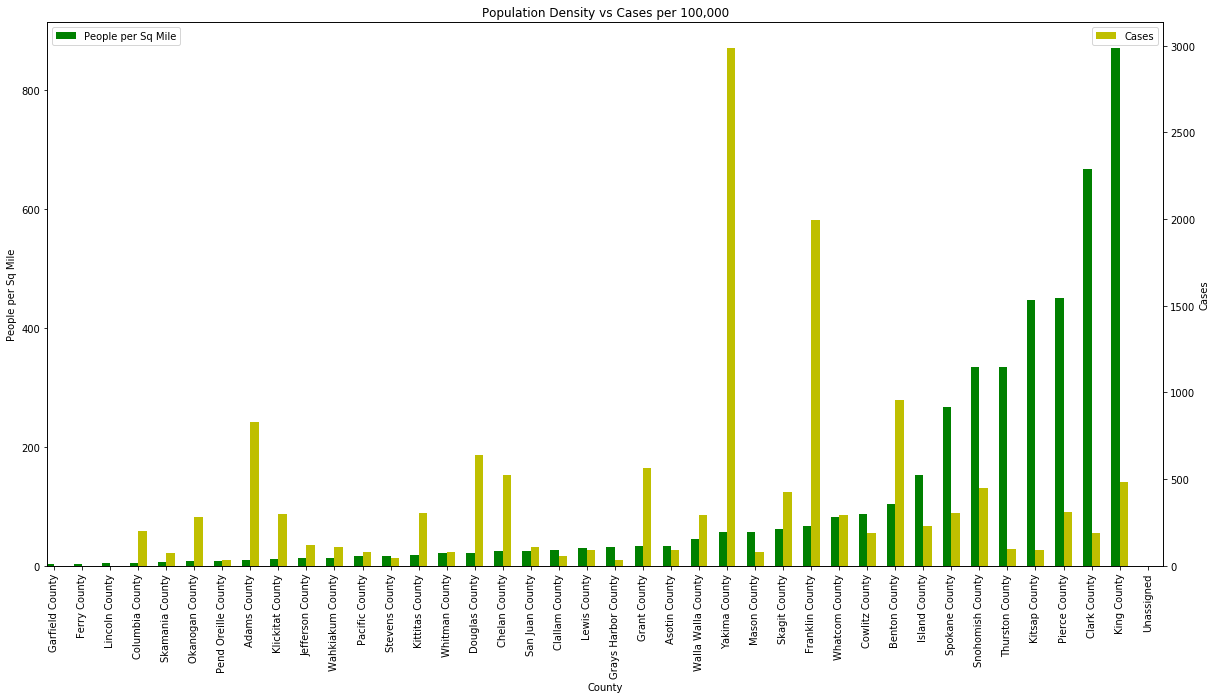

In [71]:
##Cases
figure2=plt.figure()
axel3=figure2.add_subplot(111)
axel4=axel3.twinx()
width=.3
smallrename2['Density'].plot(kind='bar',color='g',alpha=1,figsize=(20,10),ax=axel3,width=width,position=1,title='Population Density vs Cases per 100,000')
smallrename2['cases'].plot(kind='bar',color='y',alpha=1,ax=axel4,position=0,figsize=(20,10),width=width)
axel3.set_ylabel('People per Sq Mile')
axel4.set_ylabel('Cases')
axel3.legend(('People per Sq Mile',),loc='upper left')
axel4.legend(('Cases',),loc='upper right')
plt.show()

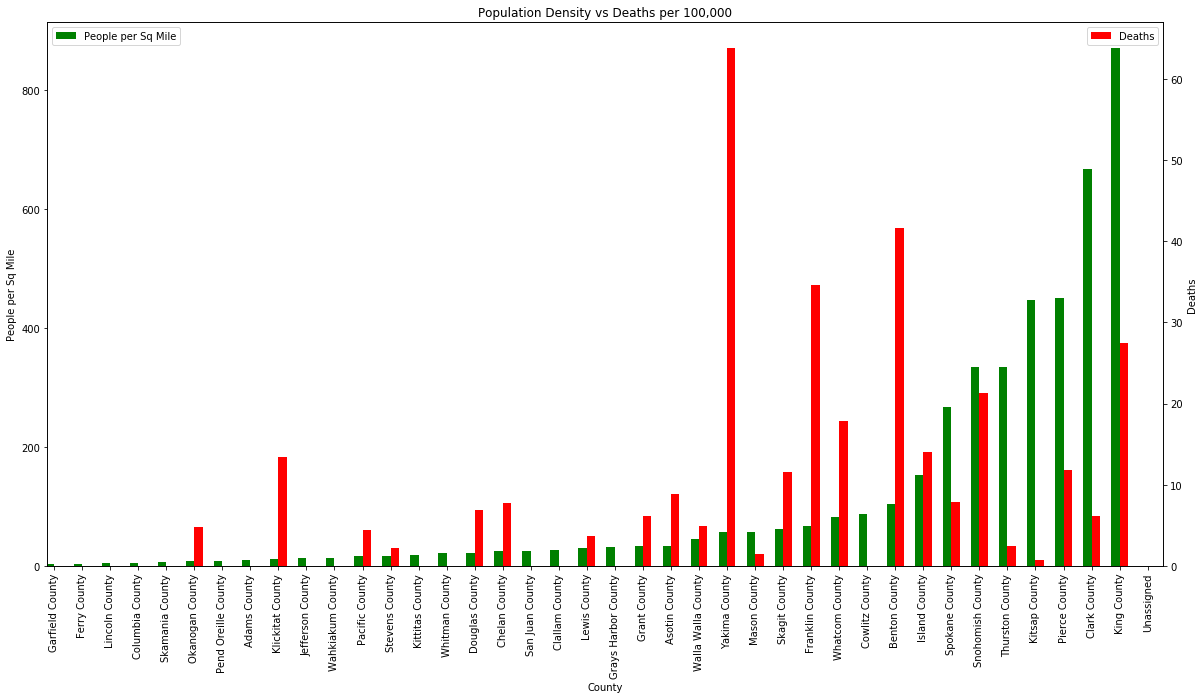

In [72]:
##Deaths
figure3=plt.figure()
axel5=figure3.add_subplot(111)
axel6=axel5.twinx()
width=.3
smallrename3['Density'].plot(kind='bar',color='g',alpha=1,figsize=(20,10),ax=axel5,width=width,position=1,title='Population Density vs Deaths per 100,000')
smallrename3['deaths'].plot(kind='bar',color='r',alpha=1,ax=axel6,position=0,figsize=(20,10),width=width)
axel5.set_ylabel('People per Sq Mile')
axel6.set_ylabel('Deaths')
axel5.legend(('People per Sq Mile',),loc='upper left')
axel6.legend(('Deaths',),loc='upper right')
plt.show()

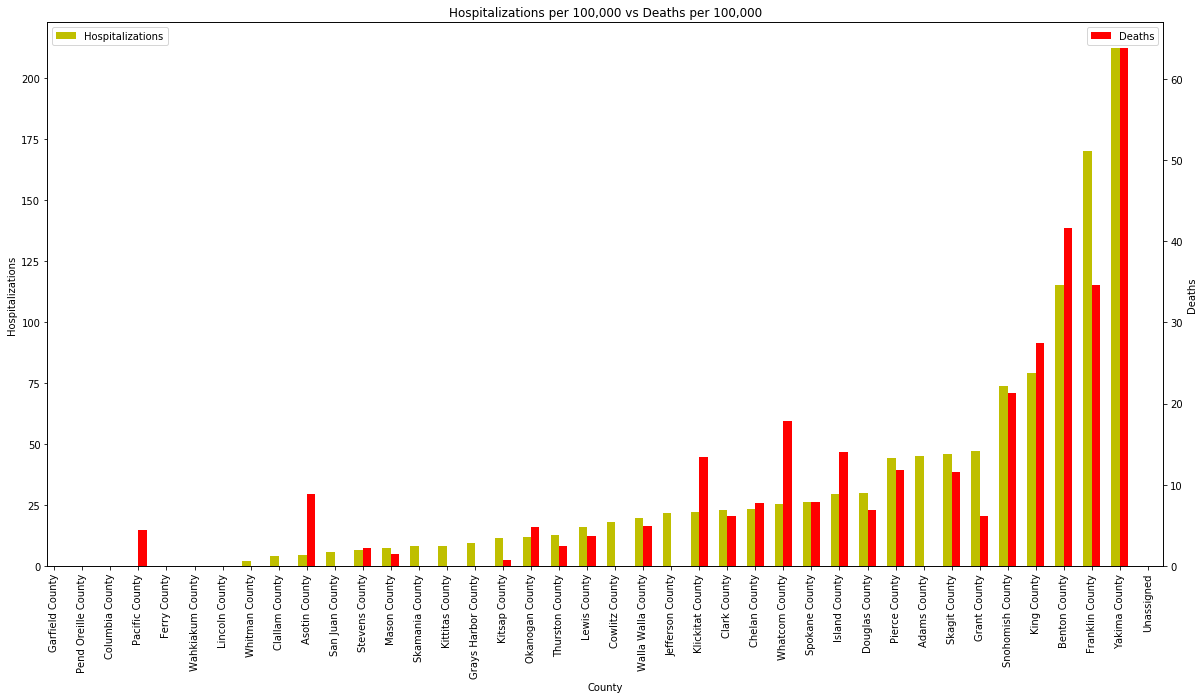

In [73]:
figure7=plt.figure()
axel7=figure7.add_subplot(111)
axel8=axel7.twinx()
width=.3
smalldf4rename['Hosp'].plot(kind='bar',color='y',alpha=1,figsize=(20,10),ax=axel7,width=width,position=1,title='Hospitalizations per 100,000 vs Deaths per 100,000')
smalldf4rename['Deaths'].plot(kind='bar',color='r',alpha=1,ax=axel8,position=0,figsize=(20,10),width=width)
axel7.set_ylabel('Hospitalizations')
axel8.set_ylabel('Deaths')
axel7.legend(('Hospitalizations',),loc='upper left')
axel8.legend(('Deaths',),loc='upper right')
plt.show()

In [74]:
hospflat=pd.DataFrame(mergedfgrouped['Hospitalizations_hospitalization'].sum())
deathflat=pd.DataFrame(mergedfgrouped['Deaths'].sum())
smalldf5=hospflat.merge(deathflat,on='County').sort_values('Hospitalizations_hospitalization')

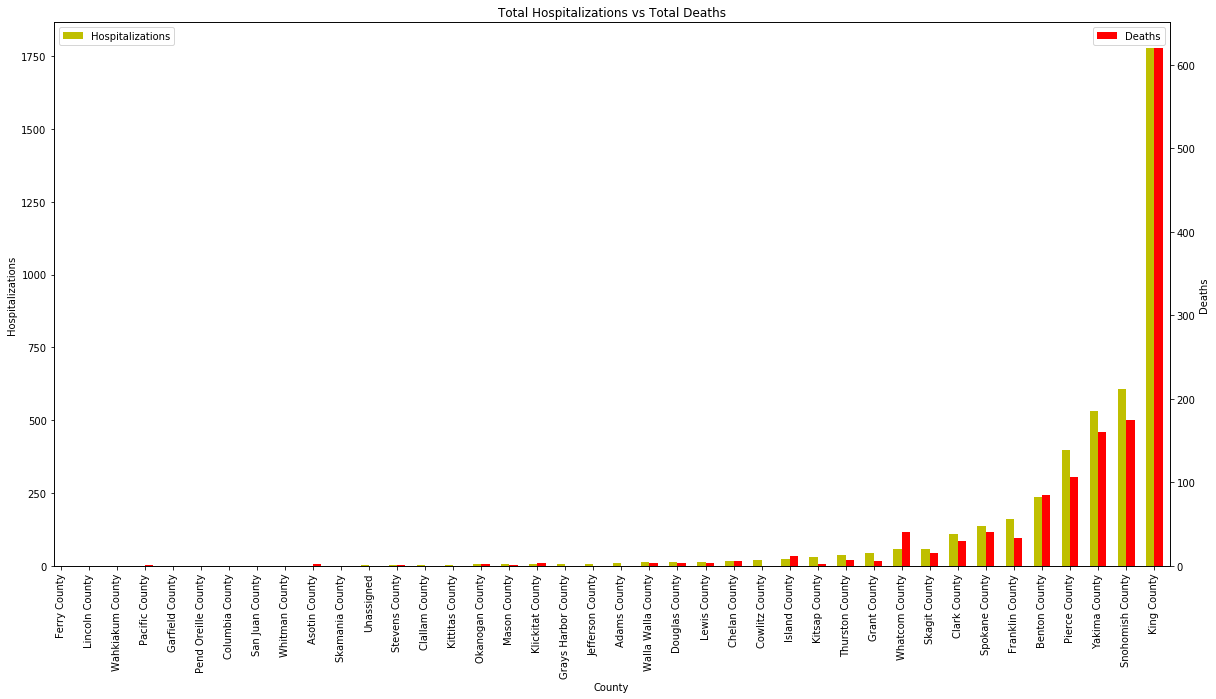

In [75]:
figure9=plt.figure()
axel9=figure9.add_subplot(111)
axel0=axel9.twinx()
width=.3
smalldf5['Hospitalizations_hospitalization'].plot(kind='bar',color='y',alpha=1,figsize=(20,10),ax=axel9,width=width,position=1,title='Total Hospitalizations vs Total Deaths')
smalldf5['Deaths'].plot(kind='bar',color='r',alpha=1,ax=axel0,position=0,figsize=(20,10),width=width)
axel9.set_ylabel('Hospitalizations')
axel0.set_ylabel('Deaths')
axel9.legend(('Hospitalizations',),loc='upper left')
axel0.legend(('Deaths',),loc='upper right')
plt.show()

In [76]:
covid_file = pd.read_csv("Final Merge 7_17_20.csv")
covid_chi_gb = covid_file.groupby("Political_Party")
covid_chi1 = covid_chi_gb.sum()
covid_chi1.columns
covid_chi1 = covid_chi1[["Deaths", "Population"]]
covid_chi1["Death Rate"] = covid_chi1["Deaths"]/ covid_chi1["Population"] 
hos_sum = covid_chi1["Deaths"].sum()
pop_sum = covid_chi1["Population"].sum()
rate_sum = covid_chi1["Death Rate"].sum()

In [77]:
covid_chi1["% Deaths by Party"] = covid_chi1["Deaths"]/ hos_sum
covid_chi1["% Party"] = covid_chi1["Population"]/ pop_sum
hed = hos_sum * 0.745041
her = hos_sum * 0.254959

In [78]:
covid_chi1["Actual Death"] = covid_chi1["Deaths"]
covid_chi1["Expected Death"] = [hed, her]
covid_chi2 = covid_chi1[["Actual Death", "Expected Death"]]
covid_chi2.columns = ["observed", "expected"]
covid_chi2

,observed,expected
Political_Party,,
Democratic,1010.0,1012.510719
Republican,349.0,346.489281


In [79]:
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [80]:
stats.chisquare(covid_chi2["expected"], covid_chi2["observed"])

Power_divergenceResult(statistic=0.024303502936167728, pvalue=0.8761151496815494)

In [81]:
##please work